# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100
import warnings

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

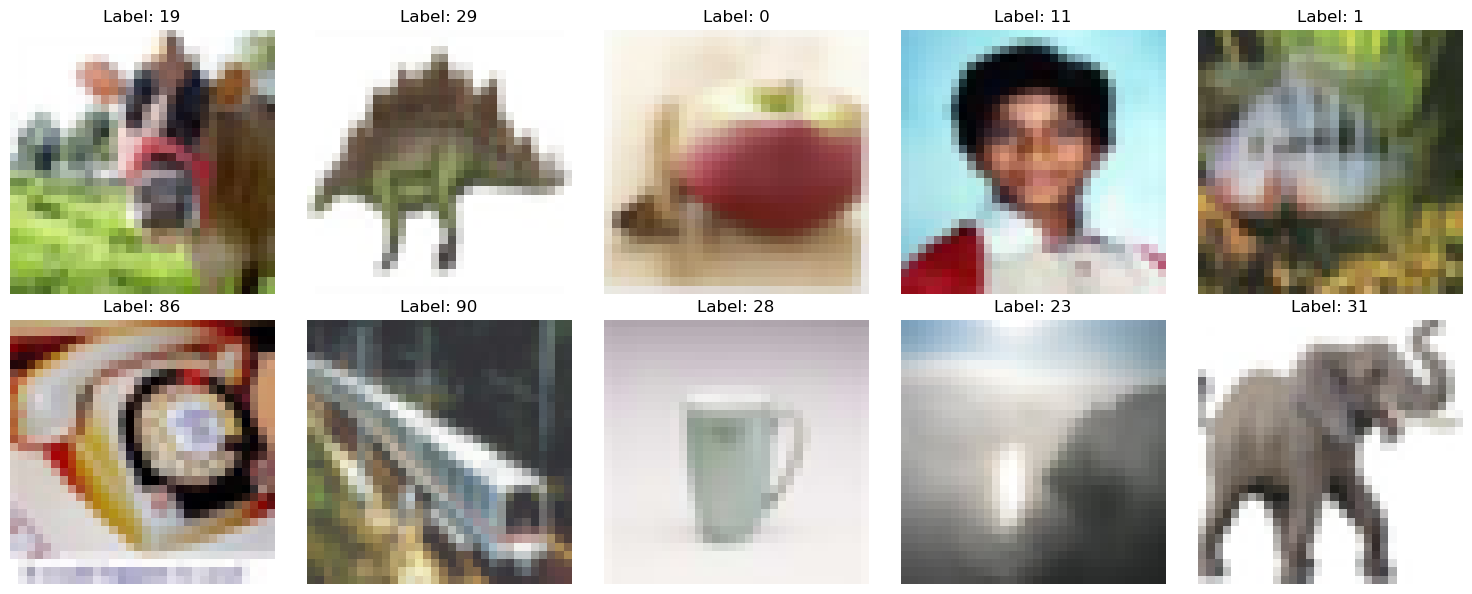

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


array([19])

In [34]:
# Your code here
import matplotlib.pyplot as plt

# Set up the grid for displaying 10 images (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot 10 images
for i in range(10):
    axes[i].imshow(X_train[i])  # Show image
    axes[i].set_title(f"Label: {y_train[i][0]}")  # Show label
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print the shapes of X_train and y_train
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

# Display the first label in y_train
y_train[0]


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [35]:
# Your code here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Normalize the images
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"Min pixel value: {X_train_normalized.min()}")
print(f"Max pixel value: {X_train_normalized.max()}")

print(f"Unique labels in y_train: {np.unique(y_train)}")

# One Hot encode
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = one_hot_encoder.transform(y_test.reshape(-1, 1))

# Split training set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_normalized, y_train_one_hot, test_size=0.2, random_state=37)

# Print the shapes to confirm everything is correct
print(f"Shape of X_train_split: {X_train_split.shape}")
print(f"Shape of y_train_split: {y_train_split.shape}")
print(f"Shape of X_val_split: {X_val_split.shape}")
print(f"Shape of y_val_split: {y_val_split.shape}")

Min pixel value: 0.0
Max pixel value: 1.0
Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Shape of X_train_split: (40000, 32, 32, 3)
Shape of y_train_split: (40000, 100)
Shape of X_val_split: (10000, 32, 32, 3)
Shape of y_val_split: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here

# Initialize the model
model = Sequential()

# First Convolutional Block with adjusted input shape
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(100, activation='softmax'))  # Assuming 100 classes for CIFAR-100

# Print the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [40]:
from keras import optimizers

# Your code here
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Loss Function:", model.loss)
print("Optimizer:", model.optimizer.__class__.__name__)
print("Learning Rate:", model.optimizer.learning_rate)

############# ANSWER TO QUESTION BELOW ##################
# Cross-entropy was chosen because I solved a multiclass problem
# Adam was chosen because it adapts learning rates and converges faster


Loss Function: categorical_crossentropy
Optimizer: Adam
Learning Rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [41]:
# Your code here
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(X_train_split)

# Define the generators for training and validation data
train_gen = datagen.flow(X_train_split, y_train_split, batch_size=32)
val_gen = datagen.flow(X_val_split, y_val_split, batch_size=32)

# Early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stopping],
    verbose=1
)

# Print the final epoch that was reached
print(f"Training stopped after {len(history.history['loss'])} epochs.")

################# ANSWER BELOW #################
# I've set the initial epoch to 20 because it's a reasonable number so once it doesn't improve, I know what's the best number of epochs.

Epoch 1/20
1250/1250 [==============================] - 44s 35ms/step - loss: 4.6059 - accuracy: 0.0089 - val_loss: 4.6062 - val_accuracy: 0.0081
Epoch 2/20
1250/1250 [==============================] - 44s 35ms/step - loss: 4.6057 - accuracy: 0.0100 - val_loss: 4.6067 - val_accuracy: 0.0079
Epoch 3/20
1250/1250 [==============================] - 42s 34ms/step - loss: 4.6057 - accuracy: 0.0099 - val_loss: 4.6069 - val_accuracy: 0.0079
Epoch 4/20
1250/1250 [==============================] - 44s 35ms/step - loss: 4.6057 - accuracy: 0.0089 - val_loss: 4.6072 - val_accuracy: 0.0079
Epoch 5/20
1250/1250 [==============================] - 45s 36ms/step - loss: 4.6057 - accuracy: 0.0095 - val_loss: 4.6071 - val_accuracy: 0.0079
Epoch 6/20
1250/1250 [==============================] - 44s 35ms/step - loss: 4.6057 - accuracy: 0.0098 - val_loss: 4.6071 - val_accuracy: 0.0079
Training stopped after 6 epochs.


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
# Your code here
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_normalized, y_test_one_hot, verbose=1)

# Print the test accuracy and loss
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

########## ANSWERS ############
# Accuracy: 0.0099
# Other metric: Loss
# Reason for selection: They are good metrics as accuracy measure the percentage of correct predictions and loss represents how well the model is predicting the correct outputs
# Loss value metric: 4.61513
# Interpretation of metric value: the results show that my model is not performing well on the test set. Accuracy is super low (0.010) and Loss is very high (4.6064)


313/313 [==============================] - 2s 8ms/step - loss: 4.6151 - accuracy: 0.0100
Test Accuracy: 0.009999999776482582
Test Loss: 4.615134239196777


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

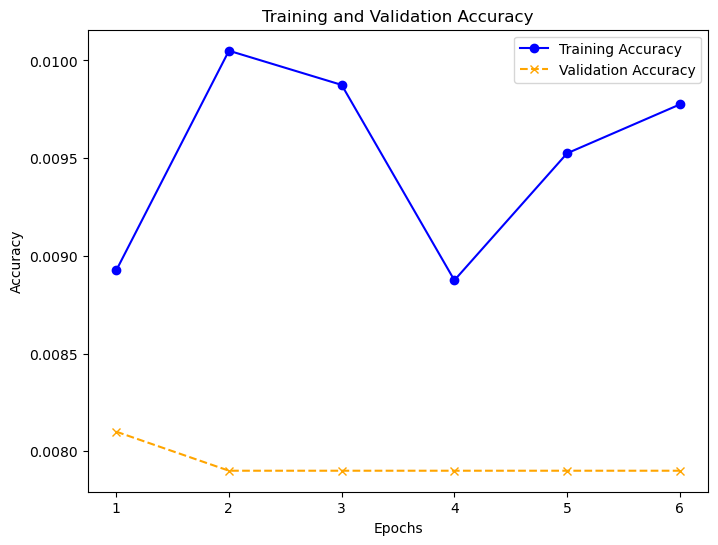

313/313 [==============================] - 2s 7ms/step


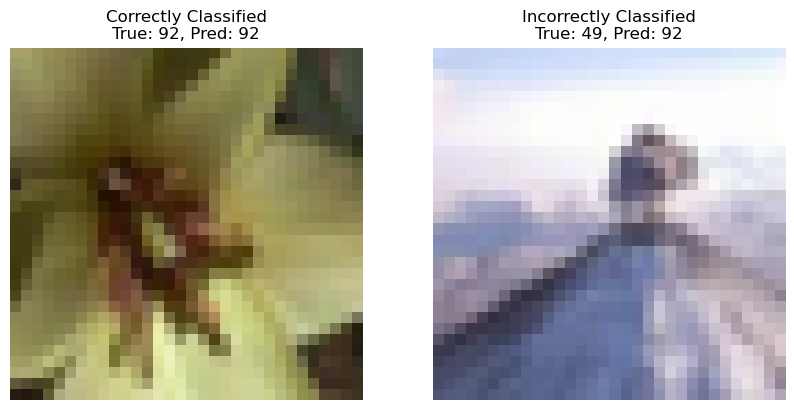

Predicted probabilities for the correctly classified image: [0.00901693 0.00903139 0.0106947  0.00981533 0.01018055 0.01238124
 0.00932495 0.00937901 0.00976508 0.00909499 0.01240854 0.01053349
 0.01090636 0.00841208 0.00874788 0.0125478  0.01087647 0.00933043
 0.00953964 0.00863253 0.01162583 0.01087908 0.00877931 0.010932
 0.00956839 0.01046426 0.00947405 0.01015883 0.01314335 0.00835685
 0.01041215 0.01176347 0.00933392 0.01053876 0.00978183 0.01156747
 0.01030434 0.0092103  0.0091272  0.00971461 0.01091439 0.01267166
 0.00700413 0.01154601 0.00697711 0.00995106 0.01000559 0.00750969
 0.00932239 0.00898938 0.01021833 0.01242106 0.01087782 0.00906504
 0.00969594 0.00931641 0.00804063 0.01076642 0.00724989 0.01077422
 0.01090667 0.01214194 0.01091234 0.00883588 0.00820613 0.00919652
 0.0098689  0.01074673 0.00881719 0.01089186 0.0105463  0.01015944
 0.01267922 0.00958259 0.00849248 0.00883582 0.00682473 0.01083959
 0.00857593 0.00969616 0.00853827 0.01052954 0.01270651 0.00918654
 0.0

In [43]:
# Your code here
import matplotlib.pyplot as plt

# Extract the accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

########### QUESTION 2 ##################

y_pred = model.predict(X_test_normalized)

y_true = np.argmax(y_test_one_hot, axis=1)

# Find an image that the model classified correctly
correct_idx = np.where(np.argmax(y_pred, axis=1) == y_true)[0][0]

# Find an image that the model classified incorrectly
incorrect_idx = np.where(np.argmax(y_pred, axis=1) != y_true)[0][0]

plt.figure(figsize=(10, 5))

# Plot correct image
plt.subplot(1, 2, 1)
plt.imshow(X_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true[correct_idx]}, Pred: {np.argmax(y_pred, axis=1)[correct_idx]}")
plt.axis('off')

# Plot incorrect image
plt.subplot(1, 2, 2)
plt.imshow(X_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true[incorrect_idx]}, Pred: {np.argmax(y_pred, axis=1)[incorrect_idx]}")
plt.axis('off')

# Display the plots
plt.show()

# Print the predicted probabilities for each image
print(f"Predicted probabilities for the correctly classified image: {y_pred[correct_idx]}")
print(f"Predicted probabilities for the incorrectly classified image: {y_pred[incorrect_idx]}")

############ ANSWER HERE ##############
# My base model is not performing well as my accuracy is low and loss is high. We will see a lot of Incorrect classification. As the probabilities are very low most of the time, shows that my model is not confident at all at learning and make right predictions. I need to improve it.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [44]:
# Your code here
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load ResNet50 pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze ResNet50 layers initially

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer='l2')(x)  # Increased Dense layer units with L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu', kernel_regularizer='l2')(x)  # Added another Dense layer
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(100, activation='softmax')(x)  # Output layer

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# Check the shape of the batch
x_batch, y_batch = next(train_gen)
print(x_batch.shape)


# Train the model (initial training with frozen base layers)
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# # # Continue training (fine-tuning)
# # history_fine = model.fit(
# #     train_gen,
# #     epochs=20,
# #     validation_data=val_gen,
# #     callbacks=[early_stopping, lr_scheduler],
# #     verbose=1
# # )

(32, 32, 32, 3)
Epoch 1/20
1250/1250 [==============================] - 224s 175ms/step - loss: 6.2040 - accuracy: 0.0154 - val_loss: 160.4759 - val_accuracy: 0.0110 - lr: 1.0000e-04
Epoch 2/20
1250/1250 [==============================] - 216s 173ms/step - loss: 4.9166 - accuracy: 0.0240 - val_loss: 97.0738 - val_accuracy: 0.0089 - lr: 1.0000e-04
Epoch 3/20
1250/1250 [==============================] - 216s 172ms/step - loss: 4.6817 - accuracy: 0.0291 - val_loss: 191.5786 - val_accuracy: 0.0104 - lr: 1.0000e-04
Epoch 4/20
1250/1250 [==============================] - 217s 173ms/step - loss: 4.5749 - accuracy: 0.0347 - val_loss: 98.2186 - val_accuracy: 0.0099 - lr: 1.0000e-04
Epoch 5/20
1250/1250 [==============================] - 213s 170ms/step - loss: 4.5183 - accuracy: 0.0371 - val_loss: 205.0741 - val_accuracy: 0.0104 - lr: 1.0000e-04
Epoch 6/20
1250/1250 [==============================] - 156s 125ms/step - loss: 4.4873 - accuracy: 0.0406 - val_loss: 17.6396 - val_accuracy: 0.0105 - 

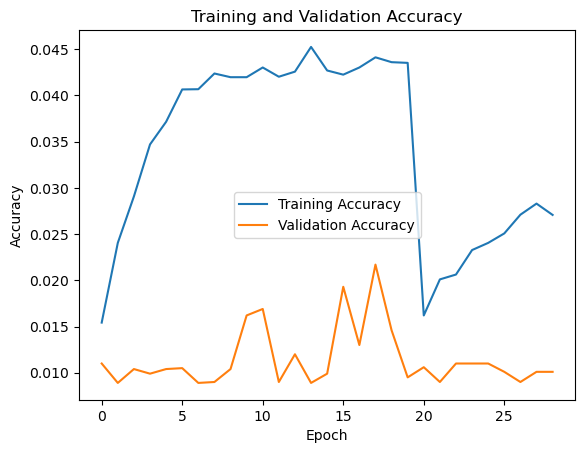

In [45]:
############ ANSWERS ##############

########### QUESTION 2 ##################

# Plot Training and Validation Accuracy
def plot_accuracy(history, history_fine):
    train_acc = history.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Call the function to plot
plot_accuracy(history, history_fine)

# My new implementations:
# - I've chosen ResNet50 because it's a deep convulational neural network that's pre-trained on the ImageNet dataset and has a good balance between depth and computational efficiency
# - Changed the learning rate to a smaller value to avoid large weight updates during fine-tuning 
# - Implemented ReduceLROnPlateau so it dinamically adjust the learning rate when the model stops learning
# - Added more layers to help the model learn more
# - Added Dropout to prevent overfitting by reducing model complexity
# - Used Data Augmentation to artificially increase the training dataset
# - Handled Class imbalanced using class weights

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

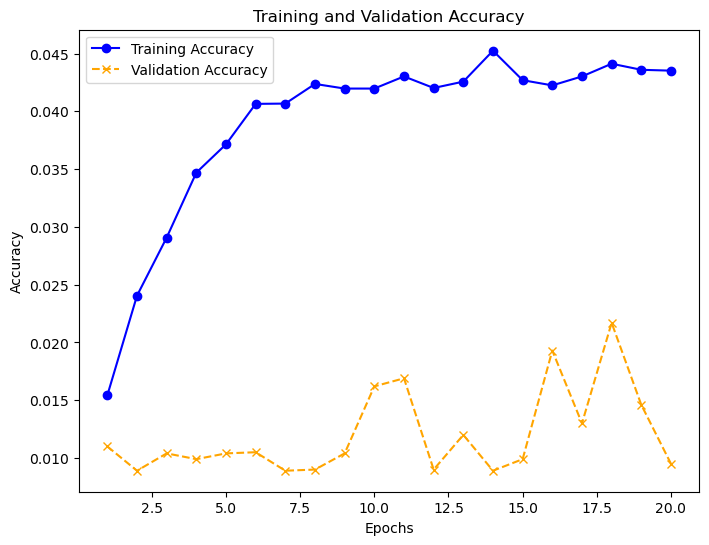

In [46]:
# Your code here

# Extract the accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

In [ ]:
# I had a very good improvement ou my new enhanced model, although the accuracy is very low and loss is very high so I'd have to take a look deeper into the dataset. 
# Somehow it stabilized around the 8 epoch
# I believe it improved because I've addressed a lot of improvements in the deep learning but there is still room for improvements for sure.
# I can think about adding more layers, changing the activation mode, and having a look at the dataset itself to make sure I can clean that up.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.